In [45]:
import os
import sys
sys.path.append('..')
sys.path.append(os.path.expanduser('~/git/illumine/'))
import numpy as np
import os
import matplotlib.pyplot as plt
from importlib import reload


In [66]:
data_dir  = os.path.expanduser('~/git/nomad-fe2o3/preliminary-data/2025_01/GSAS')
output_dir = os.path.expanduser('../data')

run_list = range(208518, 208532)
temps = [114.2, 144.9, 175.3, 205.8, 236.3, 266.7, 297.2, 327.7, 358.2, 388.6, 419.1, 449.6, 480.1, 499.6]

bank = 2
ramp = []

for j, run in enumerate(run_list):
    with open(f'{data_dir}/NOM{run}tof.gsa', 'r') as f:
        print(run)
        tof = []
        counts = []
        errors = []
        data = f.readlines()
        started = False
        for i, line in enumerate(data):
            if line.startswith('#') or line.startswith('BANK') or line.startswith('Monitor') or line.startswith('Sample'):
                if line.startswith('BANK %d' % bank):
                    started = True
                elif line.startswith('BANK'):
                    started = False
                continue
            else:
                _data = line.split()
                if started and len(_data) == 3:
                    tof.append(float(_data[0]))
                    counts.append(float(_data[1]))
                    errors.append(float(_data[2]))
        
        temp = temps[j]
        np.savetxt(f'{output_dir}/Fe2O3_BANK{bank}_{temp}.dat', np.asarray([tof, counts, errors]).T)
        ramp.append(np.asarray([tof, counts, errors]))



208518
208519
208520
208521
208522
208523
208524
208525
208526
208527
208528
208529
208530
208531


14
(3, 2999)


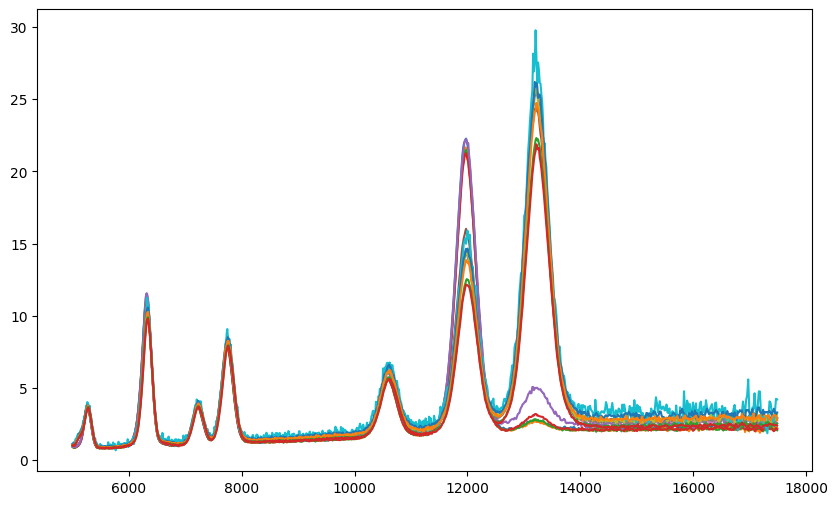

In [67]:
print(len(ramp))
print(ramp[0].shape)    

plt.figure(figsize=(10, 6))

for i, r in enumerate(ramp):
    idx = [(v >= 5000) & (v <= 17500) for v in r[0]]
    plt.plot(r[0][idx], r[1][idx], label=f'Run {i}')

In [54]:
import analyzer
reload(analyzer)

data_dir = "/Users/m2d/git/illumine/nomfe2o3/data"

analyzer.load_data(data_dir)


114.2 0
144.9 3.6496650400422763
175.3 5.476999915852565
205.8 7.6795618603762055
236.3 6.54248959567167
266.7 276.73617203413596
297.2 466.9008334229038
327.7 487.0420704418503
358.2 161.03735575886333
388.6 15.323853803363527
419.1 156.6724385459757
449.6 261.0843496353701
480.1 549.8977207607612
499.6 722.8614816614975


[1215 1341 1427 1497 1595 1732 1807 1973 2094 2158 2441 2554 2642]
[2745.1826704837963, 3153.4311885036896, 3448.203502239022, 3741.927840556585, 4186.623242433946, 4846.97592419321, 5266.893545417758, 6314.331328130988, 7219.843078209167, 7742.460198073327, 10594.644276018835, 11972.100248270457, 13228.545122550782]
13
13


/Users/m2d/git/illumine/analyzer.py:98: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  def analyzer_series(file_list, peaks, peak_width: float = 10):


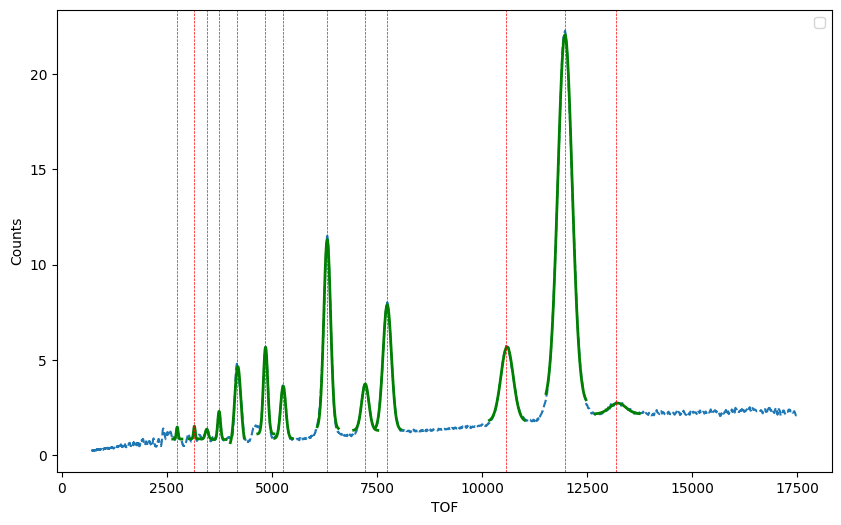

2642
13228.545122550782


In [129]:
reload(analyzer)

data_dir = "/Users/m2d/git/illumine/nomfe2o3/data"
extension = ".dat"
startswith = "Fe2O3_BANK2_"

file_list = os.listdir(data_dir)
file_list = [f for f in file_list if f.startswith(startswith)]
file_list.sort(key=lambda x: float(x.split("_")[2].replace(extension, "")))
file_list = [os.path.join(data_dir, f) for f in file_list]

peaks, center = analyzer.peak_finder(file_list[0],
                     peak_prominence=0.6)

print(peaks[-1])
print(center[-1])

Number of peaks 13
/Users/m2d/git/illumine/nomfe2o3/data/Fe2O3_BANK2_114.2.dat
/Users/m2d/git/illumine/nomfe2o3/data/Fe2O3_BANK2_144.9.dat
/Users/m2d/git/illumine/nomfe2o3/data/Fe2O3_BANK2_175.3.dat
/Users/m2d/git/illumine/nomfe2o3/data/Fe2O3_BANK2_205.8.dat
/Users/m2d/git/illumine/nomfe2o3/data/Fe2O3_BANK2_236.3.dat
/Users/m2d/git/illumine/nomfe2o3/data/Fe2O3_BANK2_266.7.dat
/Users/m2d/git/illumine/nomfe2o3/data/Fe2O3_BANK2_297.2.dat
/Users/m2d/git/illumine/nomfe2o3/data/Fe2O3_BANK2_327.7.dat
/Users/m2d/git/illumine/nomfe2o3/data/Fe2O3_BANK2_358.2.dat
/Users/m2d/git/illumine/nomfe2o3/data/Fe2O3_BANK2_388.6.dat
/Users/m2d/git/illumine/nomfe2o3/data/Fe2O3_BANK2_419.1.dat
/Users/m2d/git/illumine/nomfe2o3/data/Fe2O3_BANK2_449.6.dat
/Users/m2d/git/illumine/nomfe2o3/data/Fe2O3_BANK2_480.1.dat
/Users/m2d/git/illumine/nomfe2o3/data/Fe2O3_BANK2_499.6.dat
[[33.58865746688891, 32.46374589930531, 48.05004076021522, 123.42347172598842, 768.7617396256444, 588.1589163297201, 423.390277595763, 2011.4

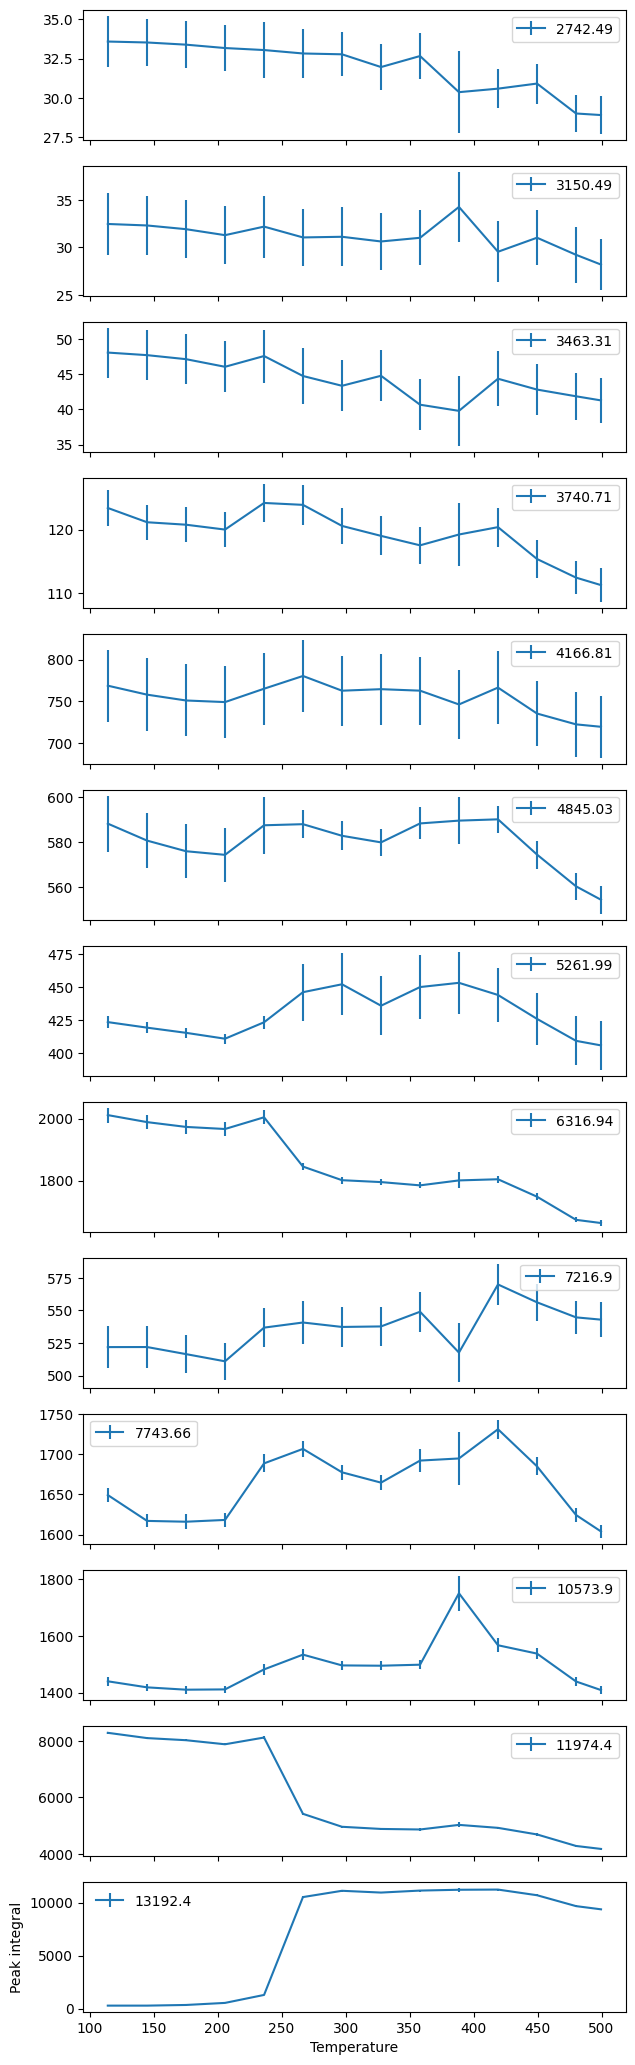

In [130]:
reload(analyzer)
analyzer.analyzer_series(file_list, peaks, peak_width=10)

In [147]:
# Given values
A0 = 14430  # Initial activity in Bq
half_life = 2.6  # Half-life in hours
time_months = 1  # Time in months

# Convert time to hours
hours_in_month = 30.44 * 24  # Average hours in a month
#total_time = time_months * hours_in_month  # Total time in hours
total_time = 24

# Number of half-lives elapsed
num_half_lives = total_time / half_life

print(num_half_lives)

# Calculate remaining activity
A = A0 * (0.5 ** num_half_lives)

print(A)


A_banana = 6e17 * np.log(2) / (1e9 * 365 * 24 * 3600)

print(A/A_banana)


9.23076923076923
24.01750609465691
1.8212006854235407


In [166]:
xs_abs = 0.171 #barns 
xs_abs = 0.171 * 1e-24 #cm^2


N = A0 / np.log(2) * (2.6 * 3600)
print("%g" % N)

# Si atom is about 30,000 times larger than the size if its nucleus.

# Interaction probability
# Atom radius 1e-10 m
atom_area = np.pi * (1e-10)**2 # m^2
atom_area = atom_area * 1e4 # cm^2

print("Cross section:", xs_abs)
print("Atom area:", atom_area)


n = xs_abs / atom_area * 1e13 * 3600 * 10



print("%g" % n)



1.94857e+08
Cross section: 1.71e-25
Atom area: 3.1415926535897933e-16
1.95952e+08
